# Importación de librerias

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(context='notebook', style='ticks',palette='viridis')

# 1.1 Importación del dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp/olimpicos.csv')


# 1.2 Muestra las primeras 5 filas y usa .info() para obtener información sobre los datos.


In [ ]:
df.head()

In [ ]:
df.info()

# 1.3 Calcula estadísticas descriptivas con .describe().


In [ ]:
df.describe()

,Edad,Altura_cm,Peso_kg,Entrenamientos_Semanales,Medallas_Totales
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,35.000000,174.571429,68.428571,7.285714,8.571429
std,6.831301,18.715921,17.614929,1.799471,6.803361
min,26.000000,142.000000,47.000000,5.000000,3.000000
25%,30.500000,167.000000,57.500000,6.000000,4.500000
50%,35.000000,175.000000,65.000000,7.000000,7.000000
75%,39.000000,188.000000,79.000000,8.500000,9.000000
max,45.000000,195.000000,94.000000,10.000000,23.000000


# 1.4 Genera un histograma del número de entrenamientos semanales.

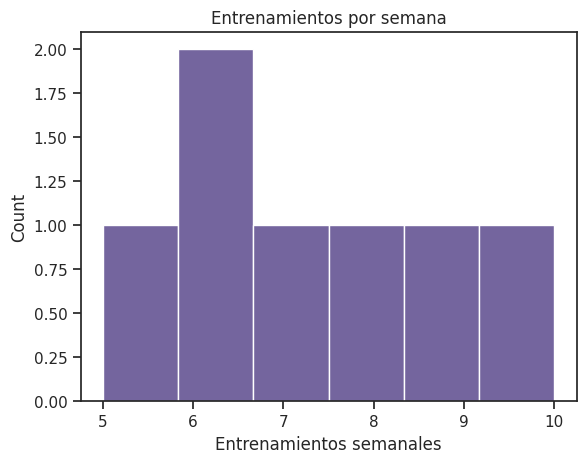

In [ ]:
sns.histplot(x = 'Entrenamientos_Semanales', data = df, bins = 6)
plt.xlabel('Entrenamientos semanales')
plt.title('Entrenamientos por semana')
plt.show()

# 2.1 Determina el tipo de variable de cada columna.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes



Atleta: cualitativa nominal          
Edad: cuantitativa continua                       
Altura en cm: cuantitativa continua   
Peso en kg: cuantitativa continua   
Deporte: cualitativa nominal   
Entrenamientos semanales: cuantitativa discreta   
Medallas totales: cuantitativa discreta          
Pais: cualitativa nominal  

# 2.2 Calcula la media, mediana y moda de la cantidad de medallas obtenidas.


In [ ]:
df['Medallas_Totales'].mean()

np.float64(8.571428571428571)

In [ ]:
df['Medallas_Totales'].median()

7.0

In [ ]:
df['Medallas_Totales'].mode()

#me devuelve todos los valores de las medallas porque como todos aparecen una vez, no hay moda clara

,Medallas_Totales
0,3
1,4
2,5
3,7
4,8
5,10
6,23


# 2.3 Calcula la desviación estándar de la altura de los atletas.


In [ ]:
df['Altura_cm'].std()

18.715921411614076

# 2.4 Identifica valores atípicos en la columna de peso utilizando un boxplot.





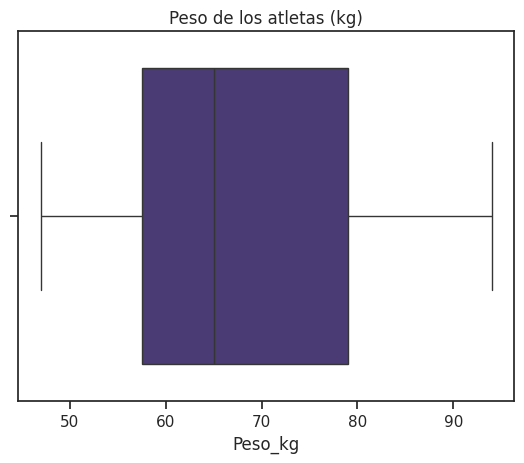

In [ ]:
sns.boxplot(x= 'Peso_kg', data = df)
plt.title('Peso de los atletas (kg)')
plt.show()

#la columna de peso no tendria valores atipicos, todos los valores se encuentran dentro
# de los limites del boxplot

# 3.1 Calcula la correlación de Pearson entre entrenamientos semanales y medallas totales.


In [ ]:
#calculamos la correlacion de Pearson para el dataframe
corr = df.corr(numeric_only=True)

In [ ]:
corr

,Edad,Altura_cm,Peso_kg,Entrenamientos_Semanales,Medallas_Totales
Edad,1.000000,0.075607,-0.078948,-0.637233,-0.265371
Altura_cm,0.075607,1.000000,0.941968,-0.357015,0.485236
Peso_kg,-0.078948,0.941968,1.000000,-0.204312,0.562254
Entrenamientos_Semanales,-0.637233,-0.357015,-0.204312,1.000000,0.569836
Medallas_Totales,-0.265371,0.485236,0.562254,0.569836,1.000000


In [ ]:
#filtramos la correlacion entre entrenamientos y medallas
corr.loc['Entrenamientos_Semanales','Medallas_Totales']


np.float64(0.5698362008613985)

Una correlacion de 0.5 no es especialmente fuerte ni debil, esta en el límite entre correlacion moderada y fuerte.

# 3.2 Crea un gráfico de dispersión (scatterplot) entre peso y medallas totales con Seaborn.

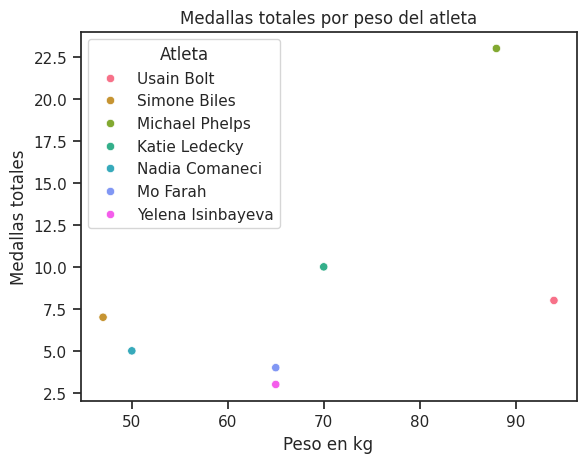

In [ ]:
sns.scatterplot(x = 'Peso_kg', y = 'Medallas_Totales', hue = 'Atleta', data = df )
plt.title('Medallas totales por peso del atleta')
plt.xlabel('Peso en kg')
plt.ylabel('Medallas totales')
plt.show()

# 3.3 Explica si existe correlación entre estas variables.


In [ ]:
corr.loc['Peso_kg','Medallas_Totales']

np.float64(0.5622542793734884)

Ademas de graficar, revisamos la correlacion de Pearson entre peso y medallas totales, encontrando que es de 0.56.


Igual que en el caso de la correlación entre entrenamientos semanales y medallas, no es un valor que denoste una correlación fuerte.

# 4. Implementa un modelo de regresión lineal para predecir el número de medallas obtenidas en función del número de entrenamientos semanales.

# 4.1 Obtén los coeficientes de regresión e interpreta el resultado.

In [ ]:
#para obtener los coeficientes de regresion beta 1 y beta 0 los calculamos de la siguiente manera:

#primero definimos las variables
x = df['Entrenamientos_Semanales']
y = df['Medallas_Totales']

x_min_mx = x - np.mean(x)  # x minus mean(x)
y_min_my = y - np.mean(y)  # y minus mean(y)

beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
beta_0 = np.mean(y) - (beta_1 * np.mean(x))

print(f'beta_1: {beta_1:5.2f} \nbeta_0: {beta_0:5.2f}')

beta_1:  2.15 
beta_0: -7.12


In [ ]:
#o usando la forma mas larga de las ecuaciones, que escribimos en el ejercicio del notebook para comprobar
# valores necesarios
sumx = np.sum(x)
sumy = np.sum(y)
sumxy = np.sum(x*y)
sumx2 = np.sum(x**2)
n = len(y)

# Fórmulas
beta_1_1 = ((sumx * sumy) - (n * sumxy)) / ((sumx)**2 - (n * sumx2))
beta_0_1 = (sumy - (beta_1_1 * sumx)) / n

print("Coeficientes:")
print("Beta 1:", beta_1_1)
print("Beta 0:", beta_0_1)

Coeficientes:
Beta 1: 2.1544117647058822
Beta 0: -7.125


De estos valores podriamos interpretar primero, que un valor β₁ = 2.15 significa que por cada entrenamiento semanal extra, se esperaria que el atleta gane 2.15 medallas mas, en promedio, si mantenemos todo lo demás constante.  


Un valor β₀ = -7.12, representa el número de medallas a ganar si alguien entrenara cero horas en la semana, lo cúal no tiene mucho sentido en la realidad, ya que no se puede ganar un número negativo de medallas.

In [ ]:
#revise con sklearn para confirmar mis calculos
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

print(f'beta_1 sklearn: {model.coef_[0]:5.2f}')
print(f'beta_0 sklearn: {model.intercept_:5.2f}')

beta_1 sklearn:  2.15
beta_0 sklearn: -7.12


# 4.2 Calcula el R² para medir el ajuste del modelo.

In [ ]:
#partimos por calcular el SST (suma total de los cuadrados)
sst = np.sum((y - np.mean(y))**2)

print(f'El SST obtenido es de {sst:.2f}')

El SST obtenido es de 277.71


In [ ]:
#luego calculamos el SSE (suma de los errores cuadrados)
#primero necesitamos sacar el valor de y sombrerito

yhat = beta_1 * x + beta_0

#ahora podemos calcular el sse

sse = np.sum((y - yhat)**2)

print(f'El SSE obtenido es de {sse:.2f}')

El SSE obtenido es de 187.54


In [ ]:
#por ultimo calculamos el R²

r2 = 1 - (sse/sst)

print(f'El R² obtenido para el modelo es de {r2:4f}')

El R² obtenido para el modelo es de 0.324713


Un valor de R² significa que nuestro modelo explica el 30% de la variabilidad de la variable dependiente (las medallas). El otro 70% de la variabilidad se explica por otros factores (como son atletas, podria ser por factores como la dieta, o su estado de salud.)

Una posible razon para este valor podria ser porque el dataset consistia en pocos datos o porque tal vez la relacion entre las variables no era lineal.

# 4.3 Usa Seaborn (regplot) para graficar la regresión lineal.

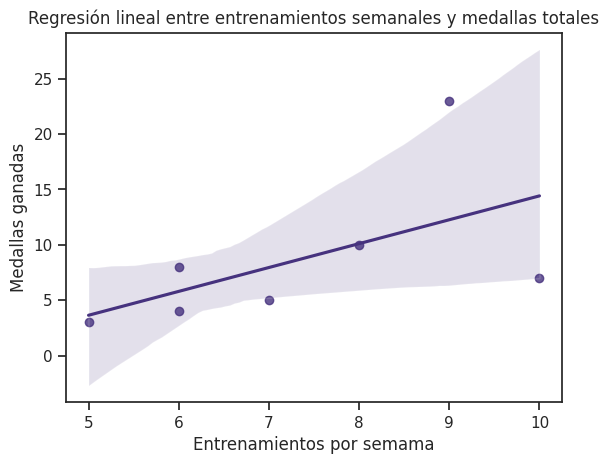

In [ ]:
sns.regplot(x = 'Entrenamientos_Semanales', y = 'Medallas_Totales', data = df)
plt.title('Regresión lineal entre entrenamientos semanales y medallas totales')
plt.xlabel('Entrenamientos por semama')
plt.ylabel('Medallas ganadas')
plt.show()

# 5.1 Crea un heatmap de correlación entre todas las variables numéricas.

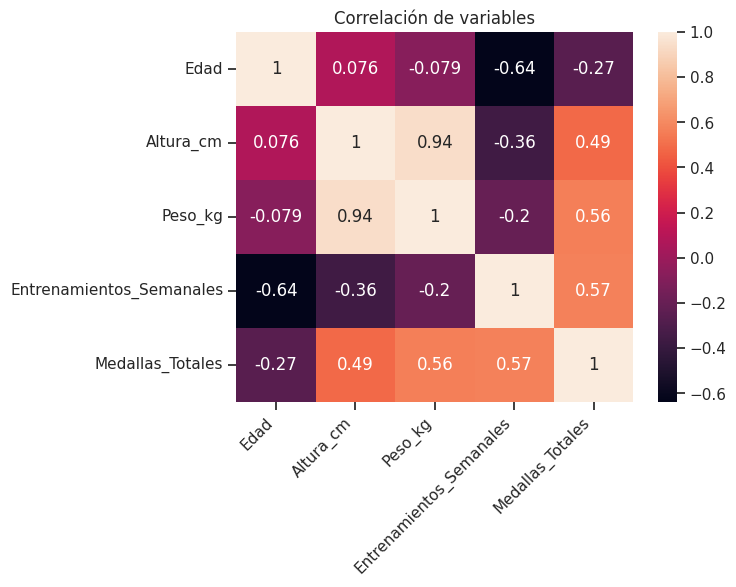

In [ ]:
sns.heatmap(corr,annot=True)
plt.title('Correlación de variables')
plt.xticks(rotation=45, ha = 'right')
plt.show()

# 5.2 Crea un boxplot de la cantidad de medallas por disciplina deportiva.

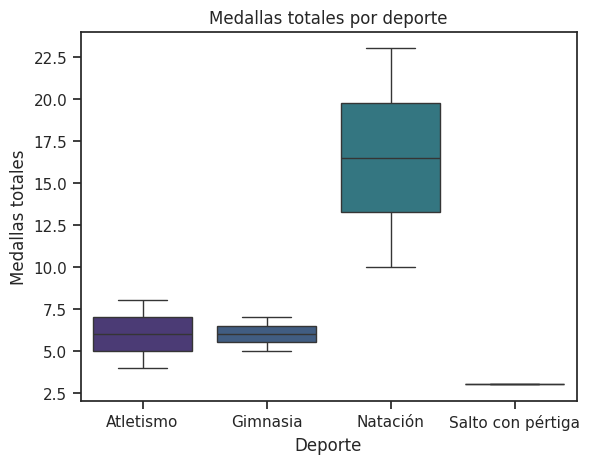

In [ ]:
sns.boxplot(x= 'Deporte', y = 'Medallas_Totales', data = df, hue = 'Deporte')
plt.title('Medallas totales por deporte')
plt.ylabel('Medallas totales')
plt.show()